In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd "/content/drive/My Drive/Activation Map Based Ensembles"

/content/drive/My Drive/Activation Map Based Ensembles


#Work Starts From Here

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import datasets
from tensorflow.keras.layers import Conv2D, Activation, GlobalAveragePooling2D, Flatten, Dense
import numpy as np 
import pandas as pd 
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from scipy import spatial
from scipy.stats import norm
from tqdm import tqdm

class ModelX(tf.keras.Model):
  
  def __init__(self, dataset_name, x_train=None, y_train=None):
  	# call the parent constructor
    super(ModelX, self).__init__()
    if type(x_train)== type(None):
    
      self.mean_activation_map = None
      self.classes = None
      (self.x_train, self.y_train), (self.x_test, self.y_test) = datasets.Datasets().load_data(dataset_name)
      self.NumClasses = 10 # Genralize this
      self.x_train = self.x_train.astype('float32')
      self.x_test = self.x_test.astype('float32')
      self.x_train /= 255                             
      self.x_test /= 255  
      self.y_train_actual = self.y_train.copy()
      self.y_test_actual = self.y_test.copy()
      self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
      self.y_test = tf.keras.utils.to_categorical(self.y_test, 10)
    else:
      self.mean_activation_map = None
      self.classes = None
      (self.x_train, self.y_train), (self.x_test, self.y_test) = datasets.Datasets().load_data(dataset_name)
      self.x_train = x_train
      self.y_train = y_train
      self.NumClasses = 10 # Genralize this
      self.x_train = self.x_train.astype('float32')
      self.x_test = self.x_test.astype('float32')
      self.x_train /= 255                             
      self.x_test /= 255  
      self.y_train_actual = self.y_train.copy()
      self.y_test_actual = self.y_test.copy()
      self.y_train = y_train
      self.y_test = tf.keras.utils.to_categorical(self.y_test, 10)
  	
    # layer set
    self.conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")
    self.conv2 = Conv2D(32, (3, 3), padding="same", activation="relu")
    
    #Flattening
    self.flatten = Flatten()
    
    #Fully connected like part
    self.dense1 = Dense(512, activation="relu")
    self.dense2 = Dense(self.NumClasses, activation="softmax") 

  def call(self, inputs):
    # forward pass
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x
  
  def train(self):
    model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
    history = model.fit(self.x_train, self.y_train, verbose=1, validation_data=(self.x_test, self.y_test),epochs=5, batch_size=32)
    loss_and_metrics = model.evaluate(self.x_test, self.y_test, batch_size=128)
    loss2_and_metrics= model.evaluate(self.x_train,self.y_train,batch_size=128)
    print('Test loss:', loss_and_metrics[0])
    print('Test accuracy:', loss_and_metrics[1])
    print("  train accuracy : ",loss2_and_metrics[1])
    return history, loss_and_metrics[0], loss_and_metrics[1]

  def train_partial(self, x_train, y_train):
    history = model.fit(x_train, y_train, verbose=1, validation_data=(self.x_test, self.y_test),epochs=5, batch_size=32)
    loss_and_metrics = model.evaluate(self.x_test, self.y_test, batch_size=128)
    loss2_and_metrics= model.evaluate(self.x_train,self.y_train,batch_size=128)
    print('Test loss:', loss_and_metrics[0])
    print('Test accuracy:', loss_and_metrics[1])
    print("  train accuracy : ",loss2_and_metrics[1])
    return history, loss_and_metrics[0], loss_and_metrics[1]
  
  def evaluate_test(self):
    loss_and_metrics = model.evaluate(self.x_test, self.y_test, batch_size=128)
    loss2_and_metrics= model.evaluate(self.x_train,self.y_train,batch_size=128)
    print('Test loss:', loss_and_metrics[0])
    print('Test accuracy:', loss_and_metrics[1])
    return

  def seperate_classes(self):              # this function sperates the data according to classes and returns a list of X_train and y_train sperated
    self.classes = np.unique(self.y_train_actual)  # on the basis of class 
    samples_per_class = []
    for c in self.classes:
      arr = self.y_train_actual==c
      arr = np.reshape(arr,(arr.shape[0]))
      samples = self.x_train[arr,:,:,:]
      labels = self.y_train[arr,:]
      #print(samples.shape)
      #print(labels.shape)
      samples_per_class.append((samples,labels))
    # print(samples_per_class)
    return samples_per_class

  def mean_activation(self, inputs):
    x = self.conv1(inputs)
    mean_act1 = x.numpy()
    mean_act1 = np.mean(mean_act1.reshape(mean_act1.shape[0], mean_act1.shape[1] * mean_act1.shape[2] * mean_act1.shape[3]), axis=0)
    #print(mean_act1.shape)

    x = self.conv2(x)
    mean_act2 = x.numpy()
    mean_act2 = np.mean(mean_act2.reshape(mean_act2.shape[0], mean_act2.shape[1] * mean_act2.shape[2] * mean_act2.shape[3]), axis=0)
    #print(mean_act2.shape)

    x = self.flatten(x)
    x = self.dense1(x)
    mean_act3 = x.numpy()
    mean_act3 = np.mean(mean_act3, axis=0)
    #print(mean_act3.shape)

    x = self.dense2(x)
    mean_act4 = x.numpy()
    mean_act4 = np.mean(mean_act4, axis=0)
    #print(mean_act4.shape)
    return np.concatenate(( mean_act3, mean_act4), axis=None) #> check if this folder work

  def get_distance(self, sample_act, mean_act, distance_name="correlation"):
    if (distance_name=="cosine"):
      distance = spatial.distance.cosine(sample_act, mean_act)
    
    elif(distance_name=="correlation"):
      distance = spatial.distance.correlation(sample_act, mean_act)
    
    elif(distance_name=="linear"):
      distance = spatial.distance.linear(sample_act, mean_act)
    
    elif(distance_name=="euclidean"):
      distance = spatial.distance.euclidean(sample_act, mean_act)
    
    else:
      print("\nSorry distance not present ") # code should stop execution here insert an assert here
    return distance
  def fit_normal_return_index(self,distance):
      mean, std = norm.fit(distance)
      print("Mean", mean)
      print("Std", std)
      print("Upper Limit", (mean+(std*2)))
      print("Lower Limit", (mean-(std*2)))
      index = np.where(distance>(mean+(std*2)))
      index2 = np.where(distance<(mean-(std*2)))
      return np.concatenate((index,index2), axis=None) # galaat howa samran ki galti

  def get_activation_per_class(self):
    # print("in get_activation_per_class")
    samples_per_class = self.seperate_classes()
    # print("classes seperated")
    mean_activation_map = {}
    for idx, single_class in enumerate(samples_per_class):
      single_class_samples = single_class[0]
      single_class_labels  = single_class[1] 
      # print("taking mean activation for single class")
      mean_activation_map[self.classes[idx]] = self.mean_activation(single_class_samples) 
      # print("Test")
      print(self.classes[idx])
      print(single_class_labels[0])
      # print("{} class done".format(idx))
    self.mean_activation_map = mean_activation_map
    return  mean_activation_map

  def get_bad_samples(self):
    all_bad_samples = []
    samples_per_class = self.seperate_classes()
    for idx, single_class in tqdm(enumerate(samples_per_class)): #loop per class
      single_class_samples = single_class[0]
      single_class_labels  = single_class[1] 
      distance_from_mean = []
      for sample in single_class_samples: #loop per sample
        # print("single class sample",sample.shape)
        sample_mean_activation = self.mean_activation(sample[np.newaxis,...])
        # print("sample_mean_activation",sample_mean_activation.shape)
        # print("class Mean activation", self.mean_activation_map[idx].shape )
        distance_from_mean.append(self.get_distance(sample_mean_activation, self.mean_activation_map[idx]))
      # Fit gaussain and get indexes
      print("Finding bad index")
      bad_sample_index = self.fit_normal_return_index(distance_from_mean)
      bad_samples = single_class_samples[bad_sample_index,:,:,:]  
      bad_samples_labels = single_class_labels[bad_sample_index,:]
      all_bad_samples.append((bad_samples, bad_samples_labels))
    return all_bad_samples

      
        


In [0]:
model = ModelX("cifar10")

dataset class object created
loading Dataset  cifar10
170500096/170498071 [==============================] - 3s 0us/step


In [0]:
model.train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 29s 583us/sample - loss: 1.4349 - accuracy: 0.4925 - val_loss: 1.1719 - val_accuracy: 0.5801
Epoch 2/5
50000/50000 [==============================] - 23s 450us/sample - loss: 0.9955 - accuracy: 0.6499 - val_loss: 1.0344 - val_accuracy: 0.6343
Epoch 3/5
50000/50000 [==============================] - 22s 450us/sample - loss: 0.6996 - accuracy: 0.7554 - val_loss: 1.0297 - val_accuracy: 0.6454
Epoch 4/5
50000/50000 [==============================] - 23s 454us/sample - loss: 0.3993 - accuracy: 0.8635 - val_loss: 1.1912 - val_accuracy: 0.6421
Epoch 5/5
50000/50000 [==============================] - 4s 84us/sample - loss: 0.0897 - accuracy: 0.9759
Test loss: 1.5609483100891113
Test accuracy: 0.6405
  train accuracy :  0.97588


(<tensorflow.python.keras.callbacks.History at 0x7feb9054a6d8>,
 1.5609483100891113,
 0.6405)

In [0]:
mean_activation_map = model.get_activation_per_class()

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
mean_activation_map[0].shape

(522,)

In [0]:
print(mean_activation_map.keys())
for key in mean_activation_map.keys():
  print(mean_activation_map[key].shape)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
(522,)
(522,)
(522,)
(522,)
(522,)
(522,)
(522,)
(522,)
(522,)
(522,)


In [0]:
bad_data = model.get_bad_samples()

1it [00:23, 23.79s/it]

Finding bad index
Mean 0.4208399064660072
Std 0.13507267771704612
Upper Limit 0.6909852619000995
Lower Limit 0.15069455103191498


2it [00:47, 23.67s/it]

Finding bad index
Mean 0.37509875757992267
Std 0.10011391586596093
Upper Limit 0.5753265893118445
Lower Limit 0.17487092584800082


3it [01:10, 23.58s/it]

Finding bad index
Mean 0.47752969224452974
Std 0.1022666979413927
Upper Limit 0.6820630881273151
Lower Limit 0.27299629636174433


4it [01:34, 23.57s/it]

Finding bad index
Mean 0.44742117789387703
Std 0.09497746224803408
Upper Limit 0.6373761023899451
Lower Limit 0.2574662533978089


5it [01:57, 23.59s/it]

Finding bad index
Mean 0.39586371214091776
Std 0.12007945215434516
Upper Limit 0.6360226164496081
Lower Limit 0.15570480783222743


6it [02:21, 23.56s/it]

Finding bad index
Mean 0.424801035836339
Std 0.09518993375890587
Upper Limit 0.6151809033541508
Lower Limit 0.23442116831852725


7it [02:44, 23.50s/it]

Finding bad index
Mean 0.37198982736170294
Std 0.11670057109921707
Upper Limit 0.605390969560137
Lower Limit 0.1385886851632688


8it [03:07, 23.44s/it]

Finding bad index
Mean 0.40036139416098593
Std 0.10531502979502967
Upper Limit 0.6109914537510452
Lower Limit 0.18973133457092659


9it [03:31, 23.43s/it]

Finding bad index
Mean 0.37894552067816256
Std 0.12314703676281288
Upper Limit 0.6252395942037883
Lower Limit 0.1326514471525368


10it [03:54, 23.50s/it]

Finding bad index
Mean 0.36723095823675395
Std 0.1003476226246897
Upper Limit 0.5679262034861333
Lower Limit 0.16653571298737455


In [0]:
x_train_bad_samples = bad_data[0][0]
y_train_bad_labels = bad_data[0][1]
for one_class in bad_data[1:]:
  print(one_class[0].shape)
  x_train_bad_samples = np.concatenate((x_train_bad_samples,one_class[0]),axis=0)
  y_train_bad_labels = np.concatenate((y_train_bad_labels,one_class[1]),axis=0)
print(x_train_bad_samples.shape)
print(y_train_bad_labels.shape)

(207, 32, 32, 3)
(155, 32, 32, 3)
(202, 32, 32, 3)
(176, 32, 32, 3)
(220, 32, 32, 3)
(203, 32, 32, 3)
(206, 32, 32, 3)
(193, 32, 32, 3)
(211, 32, 32, 3)
(1988, 32, 32, 3)
(1988, 10)


In [0]:
x_train_bad_samples.shape

(1988, 32, 32, 3)

In [0]:
model.evaluate(x=x_train_bad_samples,y=y_train_bad_labels)

1988/1988 [==============================] - 0s 211us/sample - loss: 0.2206 - accuracy: 0.9391


[0.22060580818185666, 0.93913484]

In [0]:
pred =  model.predict(x_train_bad_samples)

In [0]:
pred2 = model.predict_on_batch(x_train_bad_samples)
print(pred2)


tf.Tensor(
[[3.18631589e-01 2.41400310e-04 9.14026573e-02 ... 1.31040379e-01
  6.69122869e-07 4.77377253e-05]
 [9.65649605e-01 2.84622347e-05 2.28562369e-03 ... 3.20645972e-06
  1.06135478e-04 1.67696024e-04]
 [9.66297030e-01 8.59045122e-06 1.15577386e-04 ... 3.35010923e-02
  2.42820989e-11 1.13258922e-08]
 ...
 [1.02306503e-13 4.10653030e-07 1.01510261e-18 ... 8.78527978e-20
  7.99419016e-13 9.99999642e-01]
 [3.41266067e-17 2.19665078e-15 6.65335858e-24 ... 1.10445892e-19
  4.79285454e-17 1.00000000e+00]
 [5.13551883e-15 4.40510846e-08 6.26282728e-17 ... 3.99652406e-16
  1.26667394e-12 1.00000000e+00]], shape=(2007, 10), dtype=float32)


**New work , Finding example that missclassify on Bad Data **

In [0]:
correct_example= []
incorrect_example = []

for x in range(len(x_train_bad_samples)):
  predict = model.predict(x_train_bad_samples[x].reshape(-1,32,32,3)).round()
  if(np.argmax(predict[0]) == np.argmax(y_train_bad_labels[x])):
    correct_example.append(x_train_bad_samples[x])
  else:
    incorrect_example.append(x_train_bad_samples[x])


In [0]:
print(len(correct_example))

1831


In [0]:
len(incorrect_example)

165

In [0]:
def gallery(array, ncols=3):
    height, width, intensity = array[0].shape
    nindex=len(array)
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

Populating the interactive namespace from numpy and matplotlib


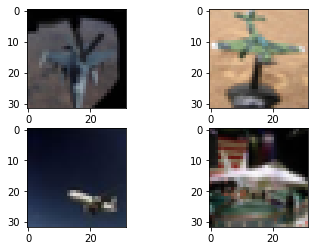

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread('your_image.png')
# imgplot2 = plt.imshow(correct_example[1])
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(correct_example[0])
axarr[0,1].imshow(correct_example[1])
axarr[1,0].imshow(correct_example[2])
axarr[1,1].imshow(correct_example[3])
# plt.show()

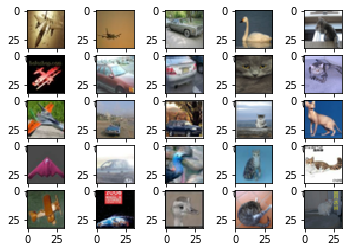

In [0]:
size = 5
itr = 0
f, axarr = plt.subplots(size,size)
for i in range(size):
  for j in range(size):
    axarr[j,i].imshow(incorrect_example[itr])
    itr+=1

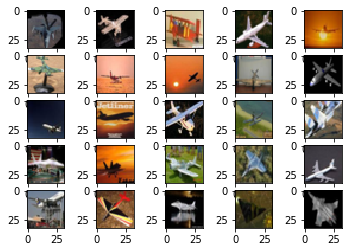

In [0]:
size = 5
itr = 0
f, axarr = plt.subplots(size,size)
for i in range(size):
  for j in range(size):
    axarr[j,i].imshow(correct_example[itr])
    itr+=1

In [0]:
x_train_bad_samples.shape[0]

2030

In [0]:
1865+165

2030

In [0]:
len(bad_data)

In [0]:
# model1 = ModelX("cifar10",x_train_bad_samples,y_train_bad_labels)

In [0]:
model.train_partial(x_train_bad_samples, y_train_bad_labels)

In [0]:
model.evaluate_test()